In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
data = pd.read_csv(r'D:\Visual Studio Code\ML\DataSet\spam.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [27]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


# Data Visulaization

<Axes: xlabel='count', ylabel='Category'>

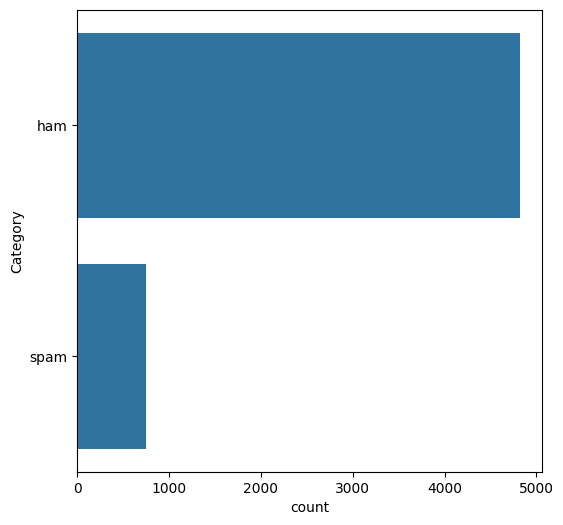

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(data['Category'])

In [29]:
data['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [30]:
mail_data = data.where((pd.notnull(data)),'')

In [31]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
mail_data.shape

(5572, 2)

Label Encoding

In [33]:
mail_data.replace({'Category':{'ham':1,'spam':0}},inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19744\2395867907.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mail_data.replace({'Category':{'ham':1,'spam':0}},inplace=True)


In [34]:
mail_data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
#Speperating the text and target data
x = mail_data['Message']
y=mail_data['Category']

In [36]:
#Splitting the data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [37]:
#tranform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

x_train_feature = feature_extraction.fit_transform(x_train)
x_test_feature = feature_extraction.transform(x_test)

#Convert y_train and y_test values as integer
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [38]:
print(x_train_feature)
print(y_train)

  (0, 4334)	0.42941702167641554
  (0, 3958)	0.6161071828926097
  (0, 6586)	0.44333254982109394
  (0, 6927)	0.48935591439341625
  (1, 2121)	0.3573617143022146
  (1, 1428)	0.5869421390016223
  (1, 6971)	0.42812434651556874
  (1, 3168)	0.5869421390016223
  (2, 5115)	0.3408491178137899
  (2, 7353)	0.31988118061968496
  (2, 3852)	0.3408491178137899
  (2, 4884)	0.35749230587184955
  (2, 5695)	0.35749230587184955
  (2, 806)	0.26730249393705324
  (2, 5894)	0.35749230587184955
  (2, 1876)	0.28751725124107325
  (2, 6878)	0.35749230587184955
  (3, 197)	0.36522237107066735
  (3, 3723)	0.16297045459835785
  (3, 2435)	0.26698378141852
  (3, 1825)	0.26858331513730566
  (3, 5231)	0.2266831802864503
  (3, 300)	0.2915969875465198
  (3, 7248)	0.23571908490908416
  (3, 5005)	0.3169028431039865
  :	:
  (4454, 2244)	0.2526916142542512
  (4454, 666)	0.28653660324238944
  (4454, 1575)	0.20946314330145205
  (4454, 1094)	0.24862733340971144
  (4454, 5068)	0.22284357632450164
  (4454, 311)	0.19547195974237946
  

In [39]:
# Calling model
model = LogisticRegression()
model.fit(x_train_feature,y_train)

LogisticRegression()

In [40]:
#Checking for the model Revaluation with training data

training_pred = model.predict(x_train_feature)
accuracy = accuracy_score(y_train,training_pred)
print("Accuracy of Model: ",accuracy)

Accuracy of Model:  0.9685887368184878


In [41]:
#Checking for the model Revaluation with testing data

testing_pred = model.predict(x_test_feature)
accuracy = accuracy_score(y_test,testing_pred)
print("Accuracy of Model: ",accuracy)

Accuracy of Model:  0.9533632286995516


# Predicting Spam and unspam Mail

In [43]:
input_data = ["REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode"]
input_data_feature = feature_extraction.transform(input_data)

pred = model.predict(input_data_feature)

if pred[0] == 0:
    print("Mail is Spam")
else:
    print("Mail is not Spam")
    

Mail is Spam
